[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sangnguyens/DoE-presentation/blob/main/nb/nb_1.ipynb)

<h1 align="center"> Build Your First model with statsmodels</h1>

## Loading libraries

In [4]:
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from scipy import stats
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
%matplotlib inline

## Loading and Transform data

In [5]:
TABS_DIR = Path("../data")

df = pd.read_csv(TABS_DIR / "dataset_1.csv")
df.head(5)

,Reaction Time (min),Temperature (degC),Yield (%)
0,30,150,39.3
1,30,160,40.0
2,40,150,40.9
3,40,160,41.5
4,35,155,40.3


In [6]:
# Transform to coded variables
dfcod = df.copy()
for var in ['Reaction Time (min)','Temperature (degC)']:
    vmin, vmax = df[var].min(), df[var].max()
    vzer = (vmin+vmax)/2
    dfcod[var] = df[var].replace({vmin:-1, vzer:0, vmax:+1})
dfcod

,Reaction Time (min),Temperature (degC),Yield (%)
0,-1,-1,39.3
1,-1,1,40.0
2,1,-1,40.9
3,1,1,41.5
4,0,0,40.3
5,0,0,40.5
6,0,0,40.7
7,0,0,40.2
8,0,0,40.6


## Modeling

In [7]:
x = sm.add_constant(df[['Reaction Time (min)','Temperature (degC)']]) # Add a column of ones to an array.
y = df['Yield (%)']
model = sm.OLS(y,x)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Yield (%)   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     47.82
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           0.000206
Time:                        14:52:05   Log-Likelihood:                 4.9036
No. Observations:                   9   AIC:                            -3.807
Df Residuals:                       6   BIC:                            -3.216
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  24.9444      2.732      9.132      0.000      18.261      31.628
Reaction Time (min)     0.1550      0.017      9.019      0.000       0.113       0.197
Temperature (degC)      0.0650      0.017      3.782      0.009       0.023       0.107
==============================================================================
Omnibus:                        0.188   Durbin-Watson:                   2.850
Prob(Omnibus):                  0.910   Jarque-Bera (JB):                0.098
Skew:                           0.114   Prob(JB):                        0.952
Kurtosis:                       2.543   Cond. No.                     7.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

How good your model fit with data

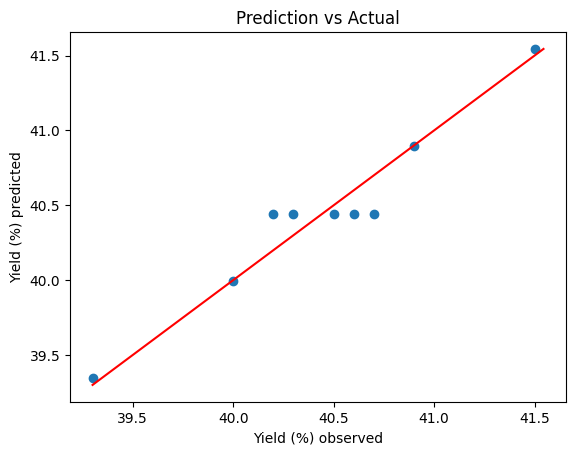

In [11]:
plt.scatter(y, res.predict())
alldata = list(y) + list(res.predict())
plt.plot([min(alldata), max(alldata)],[min(alldata), max(alldata)], color='red')
plt.xlabel(f'{y.name} observed')
plt.ylabel(f'{y.name} predicted')
plt.title("Prediction vs Actual")
plt.show()

## Using your model with new data

In [25]:
new_data = pd.DataFrame({
    'Reaction Time (min)':[45, 55],
    'Temperature (degC)':[120, 150]
})
new_data = sm.add_constant(new_data)
predictions = res.predict(new_data)

In [27]:
predictions

0    39.719444
1    43.219444
dtype: float64

<hr>